In [28]:
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
import os
import cv2

from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
spektogram, labels = [], []
folders = ['OAF_angry', 'OAF_happy', 'OAF_Sad']

In [ ]:
for folder in folders:
    for spc in glob.glob(f'speech_dataset\{folder}\*'):
        y, sr = librosa.load(spc)
        spec = np.abs(librosa.stft(y))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        spec = cv2.resize(spec, (64, 64))
        spec = spec.flatten()
        spektogram.append(spec)
        labels.append(folder)
data = pd.DataFrame(spektogram)
data['label'] = labels
data.to_csv('./dataset/spektogram.csv', index=False)

In [2]:
data = pd.read_csv('./dataset/spektogram.csv')

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,-74.547005,-69.441480,-74.354180,-70.005775,-63.871067,-64.141815,-61.870876,-59.787724,-67.943245,-76.942040,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
1,-65.116150,-72.595764,-74.772910,-71.764640,-69.378540,-70.507440,-67.222600,-59.736267,-58.273090,-63.617060,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
2,-69.728210,-71.085205,-71.162094,-70.901930,-72.016846,-72.039960,-73.833430,-71.225190,-67.749680,-74.379260,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
3,-70.544030,-73.021650,-72.255170,-69.449710,-69.694780,-70.653430,-63.136883,-60.183846,-69.370080,-75.848694,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
4,-70.798770,-71.076420,-67.429910,-68.385820,-62.089560,-59.170700,-59.488174,-64.614944,-66.215126,-65.286080,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-53.401703,-53.902237,-59.158756,-56.076485,-62.384130,-68.178734,-60.021590,-58.637850,-57.834476,-66.058920,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
596,-70.325424,-55.831593,-47.341923,-62.023273,-60.271630,-61.083256,-59.721428,-69.920240,-66.603165,-61.685600,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
597,-63.216350,-61.958763,-57.778076,-50.445473,-48.507114,-45.533030,-53.088250,-48.671726,-45.969265,-61.927917,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad
598,-54.439430,-60.839912,-61.810707,-56.806934,-60.979380,-57.318250,-65.578680,-66.443800,-65.496470,-56.883938,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_Sad


In [4]:
X = data

In [9]:
X['label'].value_counts()

OAF_angry    200
OAF_happy    200
OAF_Sad      200
Name: label, dtype: int64

In [10]:
d = {
    'OAF_angry':0,
    'OAF_happy':1,
    'OAF_Sad':2
}
X['label'] = data['label'].map(d)
X

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,-74.547005,-69.441480,-74.354180,-70.005775,-63.871067,-64.141815,-61.870876,-59.787724,-67.943245,-76.942040,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,0
1,-65.116150,-72.595764,-74.772910,-71.764640,-69.378540,-70.507440,-67.222600,-59.736267,-58.273090,-63.617060,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,0
2,-69.728210,-71.085205,-71.162094,-70.901930,-72.016846,-72.039960,-73.833430,-71.225190,-67.749680,-74.379260,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,0
3,-70.544030,-73.021650,-72.255170,-69.449710,-69.694780,-70.653430,-63.136883,-60.183846,-69.370080,-75.848694,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,0
4,-70.798770,-71.076420,-67.429910,-68.385820,-62.089560,-59.170700,-59.488174,-64.614944,-66.215126,-65.286080,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-53.401703,-53.902237,-59.158756,-56.076485,-62.384130,-68.178734,-60.021590,-58.637850,-57.834476,-66.058920,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,2
596,-70.325424,-55.831593,-47.341923,-62.023273,-60.271630,-61.083256,-59.721428,-69.920240,-66.603165,-61.685600,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,2
597,-63.216350,-61.958763,-57.778076,-50.445473,-48.507114,-45.533030,-53.088250,-48.671726,-45.969265,-61.927917,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,2
598,-54.439430,-60.839912,-61.810707,-56.806934,-60.979380,-57.318250,-65.578680,-66.443800,-65.496470,-56.883938,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,2


In [11]:
X_original = X.drop('label', axis=1).values
y_true = X['label'].to_numpy()

In [12]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

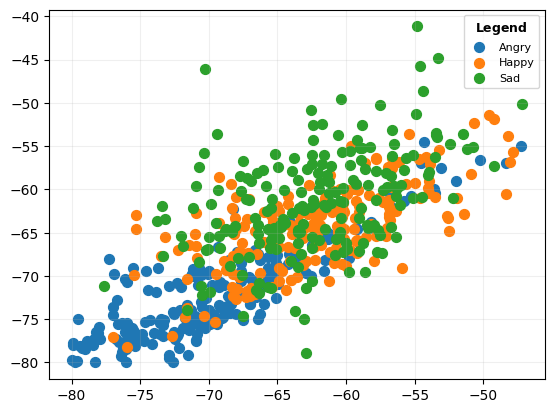

In [14]:
plt.scatter(X_original[y_true == 0, 0], X_original[y_true == 0, 1], s = 50, label = 'Angry')
plt.scatter(X_original[y_true == 1, 0], X_original[y_true == 1, 1], s = 50, label = 'Happy')
plt.scatter(X_original[y_true == 2, 0], X_original[y_true == 2, 1], s = 50, label = 'Sad')
plt.grid(axis='both', alpha = 0.2)
plt.legend(title = '$\\bf{Legend}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)

In [15]:
X1 = X.drop('label', axis=1)

In [17]:
kmeans = KMeans(random_state = 0)
y_kmeans = kmeans.fit_predict(X1)

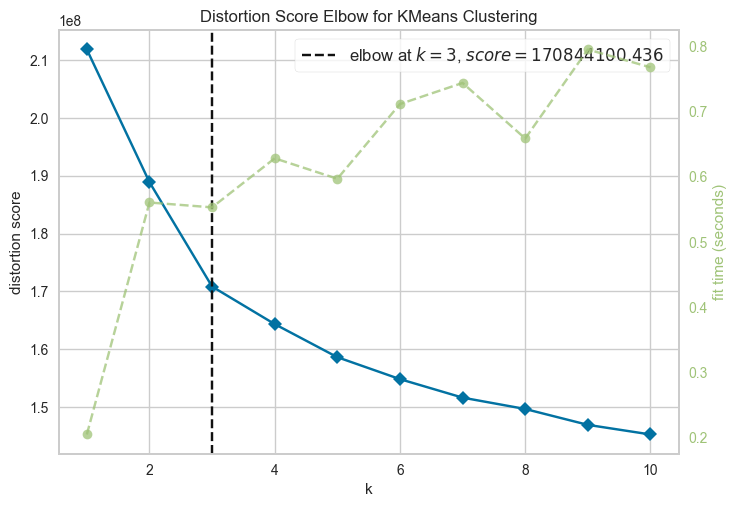

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KElbowVisualizer(kmeans, k = (1, 11))
model.fit(X1)
model.show()

In [20]:
kmeans = KMeans(random_state = 0, n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)

In [21]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

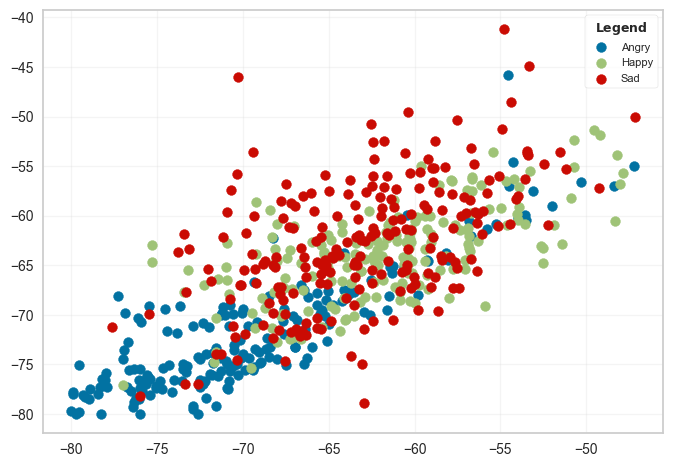

In [22]:
X1 = X1.values
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, label = 'Angry')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, label = 'Happy')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, label = 'Sad')
plt.grid(axis='both', alpha = 0.2)
plt.legend(title = '$\\bf{Legend}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)

In [25]:
sil1 = silhouette_score(X1,y_kmeans)
print(sil1)

0.1190025683929983


In [26]:
accuracy_score(y_true, y_kmeans)*100

95.0

Text(58.222222222222214, 0.5, 'Actual')

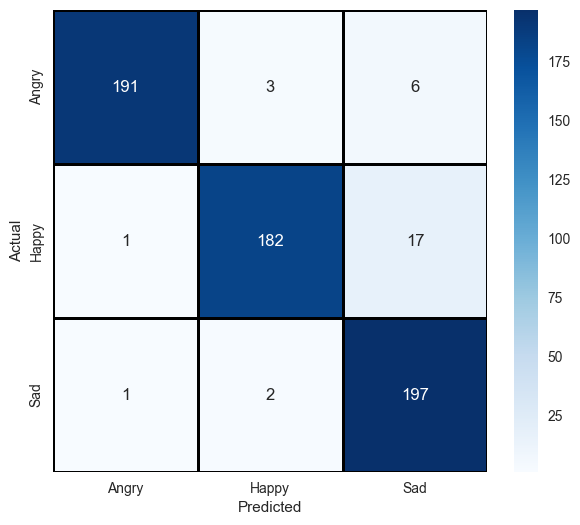

In [29]:
kmeans_cl = confusion_matrix(y_true, y_kmeans)
plt.figure(figsize = (7,6))
sns.heatmap(kmeans_cl,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Angry', 'Happy', 'Sad'], 
            yticklabels = ['Angry', 'Happy', 'Sad'])
plt.xlabel("Predicted")
plt.ylabel("Actual")